The seeds dataset used in the this exercise was originally published by the Institute of Agrophysics of the Polish Academy of Sciences in Lublin, and can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). UCI Machine Learning Repository http://archive.ics.uci.edu/ml. Irvine, CA: University of California, School of Information and Computer Science).


In [2]:
import pandas as pd

# load the training dataset
url_data = (r'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv')

data= pd.read_csv(url_data)

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
43,15.50,14.86,0.8820,5.877,3.396,4.711
84,19.51,16.71,0.8780,6.366,3.801,2.962
5,14.38,14.21,0.8951,5.386,3.312,2.462
51,15.78,14.91,0.8923,5.674,3.434,5.593
0,15.26,14.84,0.8710,5.763,3.312,2.221
107,17.63,15.86,0.8800,6.033,3.573,3.747
7,14.11,14.10,0.8911,5.420,3.302,2.700
152,12.26,13.60,0.8333,5.408,2.833,4.756
179,12.21,13.47,0.8453,5.357,2.893,1.661
3,13.84,13.94,0.8955,5.324,3.379,2.259


As you can see, the dataset contains six data points (or features) for each instance (observation) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called Principal Component Analysis (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

Now that we have the data points translated to two dimensions, we can visualize them in a plot:

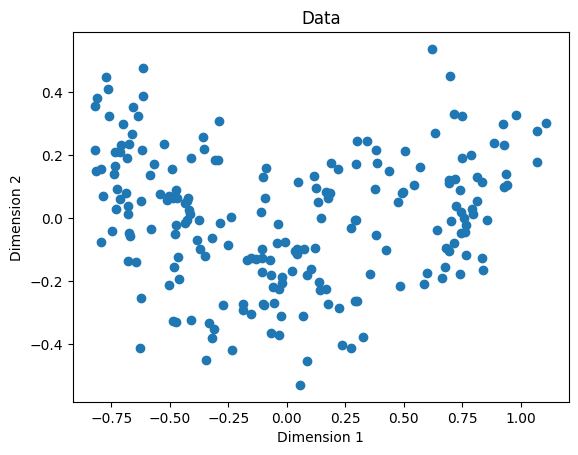

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the within cluster sum of squares (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

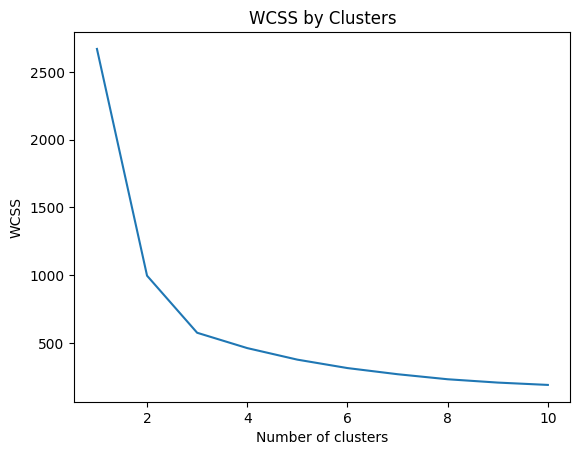

In [5]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater tightness) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.